<a href="https://colab.research.google.com/github/PranavkrishnaVadhyar/NLP-Sentiment-analyzer/blob/main/Sentiment_analysis_IMDB_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset preparation

In [ ]:
import pandas as pd


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/IMDB Dataset.csv")

#EDA


In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

Since the data set contains equal number of values for each sentiment it is a balanced dataset.

#Data preprocessing

In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 10.9 MB/s eta 0:00:00


In [ ]:
import re,string,unicodedata
from bs4 import BeautifulSoup
import contractions

import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer

In [ ]:
#Removing missing values

data.isnull()

,review,sentiment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
49995,False,False
49996,False,False
49997,False,False
49998,False,False


In [ ]:
data.dropna()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
#Converting to lowercase

data['review'] = data['review'].str.lower()
data['sentiment'] = data['sentiment'].str.lower()

In [ ]:
data

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


In [ ]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [ ]:
#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text or meaningless text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
data['review']=data['review'].apply(denoise_text)

<ipython-input-12-938e610e499c>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [ ]:
#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

In [ ]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
data['review']=data['review'].apply(remove_special_characters)

In [ ]:
data

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,i am a catholic taught in parochial elementary...,negative
49998,im going to have to disagree with the previous...,negative


In [ ]:
# Function to expand contractions
# Contractions are words or combinations of words that are shortened by dropping letters(gng = going) and replacing them by an apostrophe(I'm).
def expand_contractions(text):
    return contractions.fix(text)

# Apply the function to the 'text' column in the dataframe
data['review'] = data['review'].apply(expand_contractions)

# Print the dataframe
print(data)


                                                  review sentiment
0      one of the other reviewers has mentioned that ...  positive
1      a wonderful little production the filming tech...  positive
2      i thought this was a wonderful way to spend ti...  positive
3      basically there is a family where a little boy...  negative
4      petter matteis love in the time of money is a ...  positive
...                                                  ...       ...
49995  i thought this movie did a down right good job...  positive
49996  bad plot bad dialogue bad acting idiotic direc...  negative
49997  i am a catholic taught in parochial elementary...  negative
49998  i am going to have to disagree with the previo...  negative
49999  no one expects the star trek movies to be high...  negative

[50000 rows x 2 columns]


##Stop words

If the search engine tries to find web pages that contained the terms “how”, “to” “develop”, “information”, ”retrieval”, “applications” the search engine is going to find a lot more pages that contain the terms “how”, “to” than pages that contain information about developing information retrieval applications because the terms “how” and “to” are so commonly used in the English language. If we disregard these two terms, the search engine can actually focus on retrieving pages that contain the keywords: “develop” “information” “retrieval” “applications” – which would bring up pages that are actually of interest.

In [ ]:
nltk.download('stopwords')
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
#Apply function on review column
data['review'] = data['review'].apply(remove_stopwords)

{'they', 'm', 'y', 'him', 'ain', "doesn't", 'yours', "shouldn't", 'once', 'of', 'himself', "shan't", "hadn't", 'no', 'when', "weren't", 'hers', 'and', 'will', 'did', 'wasn', 'before', "hasn't", 'each', "isn't", 'your', 'an', 'won', 'doesn', 'have', 'this', 'again', 'should', "mustn't", 'his', "she's", 'aren', 'very', 'ours', "you'll", 'has', 'here', 'itself', 'over', 'through', "didn't", 'off', 'any', 'its', 'these', 'or', 'yourselves', 'from', 'just', 'ma', 'to', 'wouldn', 'who', 'between', 'in', 'both', 'weren', 'but', 'above', 'down', 's', 'more', 'whom', 'against', 'our', "don't", 'we', "wouldn't", 'some', 'herself', 'by', "should've", "you're", 'so', 'shan', 'than', "mightn't", 'she', 'll', 'for', 'do', 'needn', 'does', 'during', 'mightn', 'at', 're', 'until', 'then', "won't", 'me', 'shouldn', 'them', 'few', 'same', 'after', 'is', 'with', "it's", 'been', 'while', 'such', "you've", 'which', "that'll", 'there', 'doing', 've', 'isn', 'not', 'ourselves', 'what', 'd', 'i', 'her', 'only

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##Stemming and lemmatization


*   Stemming :
Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers.

Often when searching text for a certain keyword, it helps if the search returns variations of the word. For instance, searching for “boat” might also return “boats” and “boating”. Here, “boat” would be the stem for [boat, boater, boating, boats].

*   Lemmetization :
In contrast to stemming, lemmatization looks beyond word reduction and considers a language’s full vocabulary to apply a morphological analysis to words. The lemma of ‘was’ is ‘be’ and the lemma of ‘mice’ is ‘mouse’.

Lemmatization is typically seen as much more informative than simple stemming.

In [ ]:
#Stemming the text
nltk.download('wordnet')
def lemmetizer(text):
    lemmatizer = WordNetLemmatizer()
    text= ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text
#Apply function on review column
data['review']=data['review'].apply(lemmetizer)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
data

,review,sentiment
0,one reviewer mentioned watching 1 oz episode h...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake think zombie ...,negative
4,petter matteis love time money visually stunni...,positive
...,...,...
49995,thought movie right good job creative original...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,catholic taught parochial elementary school nu...,negative
49998,going disagree previous comment side maltin on...,negative


In [ ]:
data.loc[1]

review       wonderful little production filming technique ...
sentiment                                             positive
Name: 1, dtype: object

#Embedding of text

###The problem

- Given a supervised learning task to predict which tweets are about real disasters and which ones are not (classification). Here the independent variable would be the tweets (text) and the target variable would be the binary values (1: Real Disaster, 0: Not real Disaster).

- Now, Machine Learning and Deep Learning algorithms only take numeric input. So, how do we convert tweets to their numeric values? We will dive deep into the techniques to solve such problems, but first let’s look at the solution provided by word embedding.

###The solution

- Word Embeddings in NLP is a technique where individual words are represented as real-valued vectors in a lower-dimensional space and captures inter-word semantics. Each word is represented by a real-valued vector with tens or hundreds of dimensions.

- Term frequency-inverse document frequency is the machine learning algorithm that is used for word embedding for text. It comprises two metrics, namely term frequency (TF) and inverse document frequency (IDF).

- The term frequency (TF) score measures the frequency of words in a particular document. In simple words, it means that the occurrence of words is counted in the documents.

- The inverse document frequency or the IDF score measures the rarity of the words in the text. It is given more importance over the term frequency score because even though the TF score gives more weightage to frequently occurring words, the IDF score focuses on rarely used words in the corpus that may hold significant information.


In [ ]:
norm_train_reviews=data.review[:40000]
norm_train_reviews[0]

'one reviewer mentioned watching 1 oz episode hooked right exactly happened methe first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda city home manyaryans muslim gangsta latino christian italian irish moreso scuffle death stare dodgy dealing shady agreement never far awayi would say main appeal show due fact go show would dare forget pretty picture painted mainstream audience forget charm forget romanceoz mess around first episode ever saw struck nasty surreal could say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill priso

In [ ]:
norm_test_reviews=data.review[40000:]
norm_test_reviews[45005]

'read review watching piece cinematic garbage took least 2 page find somebody else think appallingly unfunny montage acme humour 70 indeed era least funny set sketch comedy ever seen till come along half skit already done infinitely better act monty python woody allen say nice piece animation last 90 second highlight film would still get close summing mindless drivelridden waste 75 minute seminal comedy world seminal really mean semen scatological humour world scat actually feces precursor joke mean handbook comedy tit bum odd beaver niceif pubescent boy least one hand free found playboy exists give break early 70 way sketch comedy going back least ten year prior way could even forgive film even made gunpoint retro hardly sketch clown subtly perverting child may cutting edge circle could actually funny come really quite sad kept going throughout entire 75 minute sheer belief may saved genuinely funny skit end gave film 1 lower scoreand recommend insomniac coma patientsor perhaps people

#Test train split

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into 70% training and 30% testing
train_reviews, test_reviews, train_sentiments, test_sentiments = train_test_split(
    data.review, data.sentiment, test_size=0.3, random_state=42)

# Printing the shapes of the train and test datasets
print(train_reviews.shape, train_sentiments.shape)
print(test_reviews.shape, test_sentiments.shape)


(35000,) (35000,)
(15000,) (15000,)


In [ ]:

# Count vectorizer for bag of words
cv = CountVectorizer(min_df=0, max_df=1, binary=False, ngram_range=(1,3))

# Transformed train reviews
cv_train_reviews = cv.fit_transform(train_reviews)

# Transformed test reviews
cv_test_reviews = cv.transform(test_reviews)

print('BOW_cv_train:', cv_train_reviews.shape)
print('BOW_cv_test:', cv_test_reviews.shape)


BOW_cv_train: (35000, 5652790)
BOW_cv_test: (15000, 5652790)


In [ ]:
# loading library
import pickle
with open('vectorizer_pkl', 'wb') as files:
    pickle.dump(cv_train_reviews, files)

In [ ]:


# Tfidf vectorizer
tv = TfidfVectorizer(min_df=0, max_df=1, use_idf=True, ngram_range=(1,3))

# Transformed train reviews
tv_train_reviews = tv.fit_transform(train_reviews)

# Transformed test reviews
tv_test_reviews = tv.transform(test_reviews)

print('Tfidf_train:', tv_train_reviews.shape)
print('Tfidf_test:', tv_test_reviews.shape)


Tfidf_train: (35000, 5652790)
Tfidf_test: (15000, 5652790)


#Testing models

###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


In [ ]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

['positive' 'positive' 'negative' ... 'negative' 'positive' 'positive']
['positive' 'positive' 'negative' ... 'negative' 'positive' 'negative']


Classification Report for Bag of Words:
              precision    recall  f1-score   support

    negative       0.72      0.77      0.74      7411
    positive       0.76      0.71      0.73      7589

    accuracy                           0.74     15000
   macro avg       0.74      0.74      0.74     15000
weighted avg       0.74      0.74      0.74     15000

Classification Report for TF-IDF Features:
              precision    recall  f1-score   support

    negative       0.69      0.82      0.75      7411
    positive       0.79      0.63      0.70      7589

    accuracy                           0.73     15000
   macro avg       0.74      0.73      0.73     15000
weighted avg       0.74      0.73      0.73     15000

Accuracy for Bag of Words: 0.7387333333333334
Accuracy for TF-IDF Features: 0.7278666666666667
Precision for Bag of Words: 0.7565715883668904
Precision for TF-IDF Features: 0.7863792258696717
Recall for Bag of Words: 0.7130056660956647
Recall for TF-IDF Features:

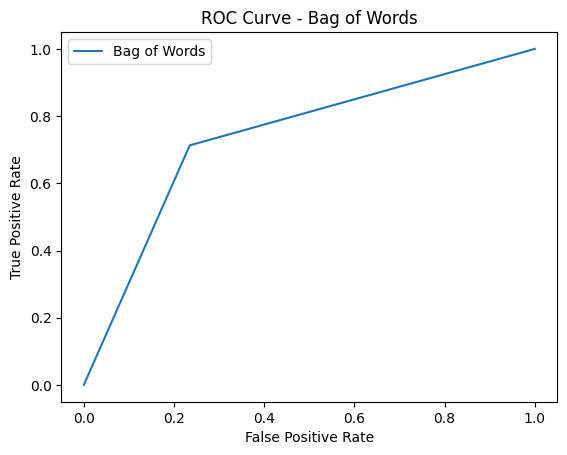

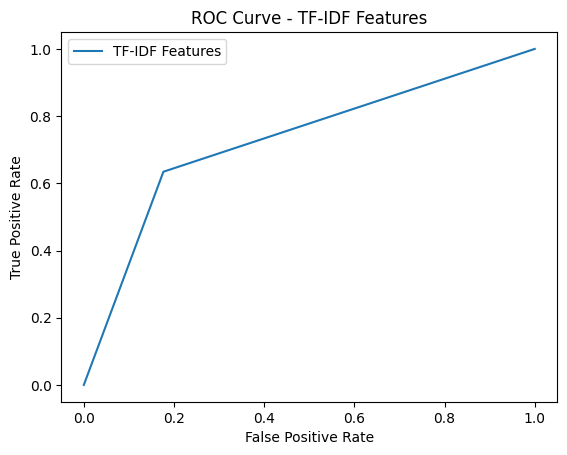

In [ ]:
#Testing



from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predicting the model for bag of words
lr_bow_predict = lr_bow.predict(cv_test_reviews)

# Predicting the model for tfidf features
lr_tfidf_predict = lr_tfidf.predict(tv_test_reviews)

# Classification Report for bag of words
print("Classification Report for Bag of Words:")
print(classification_report(test_sentiments, lr_bow_predict))

# Classification Report for tfidf features
print("Classification Report for TF-IDF Features:")
print(classification_report(test_sentiments, lr_tfidf_predict))

# Accuracy for bag of words
lr_bow_accuracy = accuracy_score(test_sentiments, lr_bow_predict)
print("Accuracy for Bag of Words:", lr_bow_accuracy)

# Accuracy for tfidf features
lr_tfidf_accuracy = accuracy_score(test_sentiments, lr_tfidf_predict)
print("Accuracy for TF-IDF Features:", lr_tfidf_accuracy)

# Convert labels to binary values
test_sentiments_binary = [1 if sentiment == 'positive' else 0 for sentiment in test_sentiments]
lr_bow_predict_binary = [1 if sentiment == 'positive' else 0 for sentiment in lr_bow_predict]

# Precision for bag of words
lr_bow_precision = precision_score(test_sentiments_binary, lr_bow_predict_binary)
print("Precision for Bag of Words:", lr_bow_precision)

lr_tfidf_predict_binary = [1 if sentiment == 'positive' else 0 for sentiment in lr_tfidf_predict]

# Precision for tfidf features
lr_tfidf_precision = precision_score(test_sentiments_binary, lr_tfidf_predict_binary)
print("Precision for TF-IDF Features:", lr_tfidf_precision)

# Recall for bag of words
lr_bow_recall = recall_score(test_sentiments_binary, lr_bow_predict_binary)
print("Recall for Bag of Words:", lr_bow_recall)

# Recall for tfidf features
lr_tfidf_recall = recall_score(test_sentiments_binary, lr_tfidf_predict_binary)
print("Recall for TF-IDF Features:", lr_tfidf_recall)

# F1-score for bag of words
lr_bow_f1_score = f1_score(test_sentiments_binary, lr_bow_predict_binary)
print("F1-Score for Bag of Words:", lr_bow_f1_score)

# F1-score for tfidf features
lr_tfidf_f1_score = f1_score(test_sentiments_binary, lr_tfidf_predict_binary)
print("F1-Score for TF-IDF Features:", lr_tfidf_f1_score)

# AUC-ROC Score for bag of words
lr_bow_auc_roc_score = roc_auc_score(test_sentiments_binary, lr_bow_predict_binary)
print("AUC-ROC Score for Bag of Words:", lr_bow_auc_roc_score)

# AUC-ROC Score for tfidf features
lr_tfidf_auc_roc_score = roc_auc_score(test_sentiments_binary, lr_tfidf_predict_binary)
print("AUC-ROC Score for TF-IDF Features:", lr_tfidf_auc_roc_score)

# Plot ROC Curve for bag of words
lr_bow_fpr, lr_bow_tpr, lr_bow_thresholds = roc_curve(test_sentiments_binary, lr_bow_predict_binary)
plt.plot(lr_bow_fpr, lr_bow_tpr, label="Bag of Words")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Bag of Words")
plt.legend()
plt.show()

# Plot ROC Curve for tfidf features
lr_tfidf_fpr, lr_tfidf_tpr, lr_tfidf_thresholds = roc_curve(test_sentiments_binary, lr_tfidf_predict_binary)
plt.plot(lr_tfidf_fpr, lr_tfidf_tpr, label="TF-IDF Features")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - TF-IDF Features")
plt.legend()
plt.show()


###Support vector machines

In [ ]:
from sklearn.linear_model import SGDClassifier

#training the linear svm
model=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
#fitting the svm for bag of words
model_bow=model.fit(cv_train_reviews,train_sentiments)
print(model_bow)
#fitting the svm for tfidf features
model_tfidf=model.fit(tv_train_reviews,train_sentiments)
print(model_tfidf)

SGDClassifier(max_iter=500, random_state=42)
SGDClassifier(max_iter=500, random_state=42)


In [ ]:
model_bow_predict=model.predict(cv_test_reviews)
print(model_bow_predict)
#Predicting the model for tfidf features
model_tfidf_predict=model.predict(tv_test_reviews)
print(model_tfidf_predict)

['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']
['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']


Classification Report for Bag of Words:
              precision    recall  f1-score   support

    negative       0.50      1.00      0.66      7411
    positive       0.99      0.01      0.03      7589

    accuracy                           0.50     15000
   macro avg       0.74      0.51      0.34     15000
weighted avg       0.75      0.50      0.34     15000

Classification Report for TF-IDF Features:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    negative       0.49      1.00      0.66      7411
    positive       0.00      0.00      0.00      7589

    accuracy                           0.49     15000
   macro avg       0.25      0.50      0.33     15000
weighted avg       0.24      0.49      0.33     15000

Accuracy for Bag of Words: 0.5005333333333334
Accuracy for TF-IDF Features: 0.49406666666666665
Precision for Bag of Words: 0.98989898989899
Precision for TF-IDF Features: 0.0
Recall for Bag of Words: 0.012913427329028858
Recall for TF-IDF Features: 0.0
F1-Score for Bag of Words: 0.025494276795005204


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1-Score for TF-IDF Features: 0.0
AUC-ROC Score for Bag of Words: 0.5063892463861445
AUC-ROC Score for TF-IDF Features: 0.5


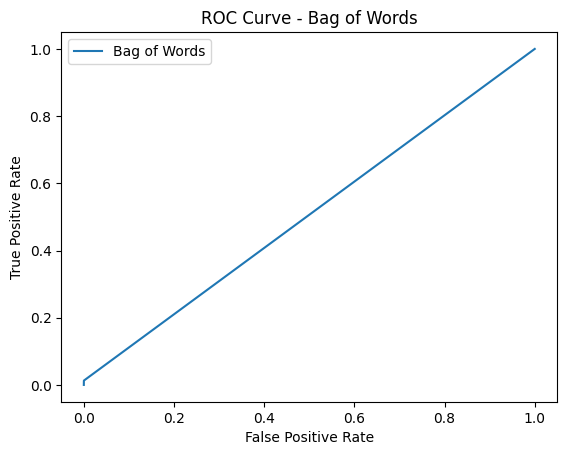

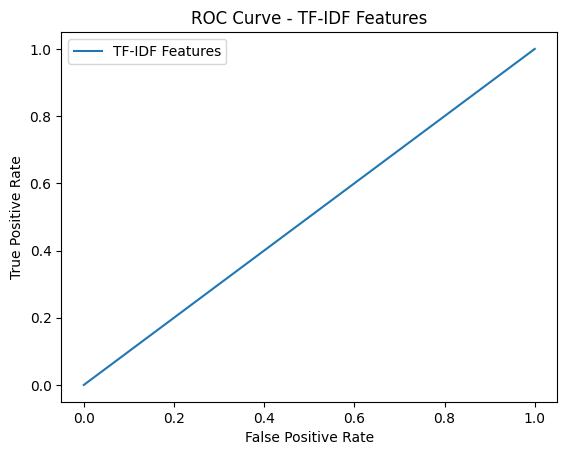

In [ ]:
#Testing



from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predicting the model for bag of words
model_bow_predict = model_bow.predict(cv_test_reviews)

# Predicting the model for tfidf features
model_tfidf_predict = model_tfidf.predict(tv_test_reviews)

# Classification Report for bag of words
print("Classification Report for Bag of Words:")
print(classification_report(test_sentiments, model_bow_predict))

# Classification Report for tfidf features
print("Classification Report for TF-IDF Features:")
print(classification_report(test_sentiments, model_tfidf_predict))

# Accuracy for bag of words
model_bow_accuracy = accuracy_score(test_sentiments, model_bow_predict)
print("Accuracy for Bag of Words:", model_bow_accuracy)

# Accuracy for tfidf features
model_tfidf_accuracy = accuracy_score(test_sentiments, model_tfidf_predict)
print("Accuracy for TF-IDF Features:", model_tfidf_accuracy)

# Convert labels to binary values
test_sentiments_binary = [1 if sentiment == 'positive' else 0 for sentiment in test_sentiments]
model_bow_predict_binary = [1 if sentiment == 'positive' else 0 for sentiment in model_bow_predict]

# Precision for bag of words
model_bow_precision = precision_score(test_sentiments_binary, model_bow_predict_binary)
print("Precision for Bag of Words:", model_bow_precision)

model_tfidf_predict_binary = [1 if sentiment == 'positive' else 0 for sentiment in model_tfidf_predict]

# Precision for tfidf features
model_tfidf_precision = precision_score(test_sentiments_binary, model_tfidf_predict_binary)
print("Precision for TF-IDF Features:", model_tfidf_precision)

# Recall for bag of words
model_bow_recall = recall_score(test_sentiments_binary, model_bow_predict_binary)
print("Recall for Bag of Words:", model_bow_recall)

# Recall for tfidf features
model_tfidf_recall = recall_score(test_sentiments_binary, model_tfidf_predict_binary)
print("Recall for TF-IDF Features:", model_tfidf_recall)

# F1-score for bag of words
model_bow_f1_score = f1_score(test_sentiments_binary, model_bow_predict_binary)
print("F1-Score for Bag of Words:", model_bow_f1_score)

# F1-score for tfidf features
model_tfidf_f1_score = f1_score(test_sentiments_binary, model_tfidf_predict_binary)
print("F1-Score for TF-IDF Features:", model_tfidf_f1_score)

# AUC-ROC Score for bag of words
model_bow_auc_roc_score = roc_auc_score(test_sentiments_binary, model_bow_predict_binary)
print("AUC-ROC Score for Bag of Words:", model_bow_auc_roc_score)

# AUC-ROC Score for tfidf features
model_tfidf_auc_roc_score = roc_auc_score(test_sentiments_binary, model_tfidf_predict_binary)
print("AUC-ROC Score for TF-IDF Features:", model_tfidf_auc_roc_score)

# Plot ROC Curve for bag of words
model_bow_fpr, model_bow_tpr, model_bow_thresholds = roc_curve(test_sentiments_binary, model_bow_predict_binary)
plt.plot(model_bow_fpr, model_bow_tpr, label="Bag of Words")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Bag of Words")
plt.legend()
plt.show()

# Plot ROC Curve for tfidf features
model_tfidf_fpr, model_tfidf_tpr, model_tfidf_thresholds = roc_curve(test_sentiments_binary, model_tfidf_predict_binary)
plt.plot(model_tfidf_fpr, model_tfidf_tpr, label="TF-IDF Features")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - TF-IDF Features")
plt.legend()
plt.show()


###Naive bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

#training the model
model=MultinomialNB()
#fitting the svm for bag of words
model_bow=model.fit(cv_train_reviews,train_sentiments)
print(model_bow)
#fitting the svm for tfidf features
model_tfidf=model.fit(tv_train_reviews,train_sentiments)
print(model_tfidf)

MultinomialNB()
MultinomialNB()


In [ ]:
#Predicting the model for bag of words
model_bow_predict=model.predict(cv_test_reviews)
print(model_bow_predict)
#Predicting the model for tfidf features
model_tfidf_predict=model.predict(tv_test_reviews)
print(model_tfidf_predict)

['positive' 'positive' 'positive' ... 'negative' 'positive' 'positive']
['positive' 'positive' 'negative' ... 'negative' 'positive' 'positive']


Classification Report for Bag of Words:
              precision    recall  f1-score   support

    negative       0.73      0.76      0.74      7411
    positive       0.75      0.72      0.74      7589

    accuracy                           0.74     15000
   macro avg       0.74      0.74      0.74     15000
weighted avg       0.74      0.74      0.74     15000

Classification Report for TF-IDF Features:
              precision    recall  f1-score   support

    negative       0.71      0.78      0.75      7411
    positive       0.76      0.70      0.73      7589

    accuracy                           0.74     15000
   macro avg       0.74      0.74      0.74     15000
weighted avg       0.74      0.74      0.74     15000

Accuracy for Bag of Words: 0.7396
Accuracy for TF-IDF Features: 0.7368666666666667
Precision for Bag of Words: 0.752156647952896
Precision for TF-IDF Features: 0.7627705627705628
Recall for Bag of Words: 0.7238107787587298
Recall for TF-IDF Features: 0.6965344577

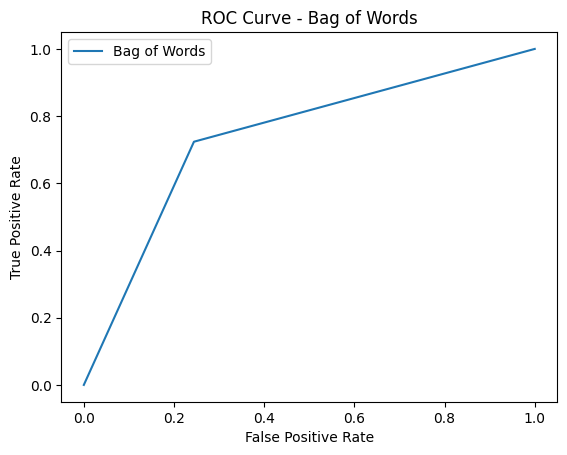

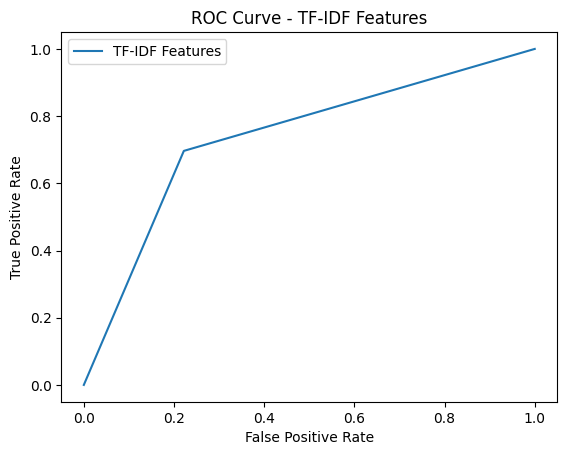

In [ ]:
#Testing



from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predicting the model for bag of words
model_bow_predict = model_bow.predict(cv_test_reviews)

# Predicting the model for tfidf features
model_tfidf_predict = model_tfidf.predict(tv_test_reviews)

# Classification Report for bag of words
print("Classification Report for Bag of Words:")
print(classification_report(test_sentiments, model_bow_predict))

# Classification Report for tfidf features
print("Classification Report for TF-IDF Features:")
print(classification_report(test_sentiments, model_tfidf_predict))

# Accuracy for bag of words
model_bow_accuracy = accuracy_score(test_sentiments, model_bow_predict)
print("Accuracy for Bag of Words:", model_bow_accuracy)

# Accuracy for tfidf features
model_tfidf_accuracy = accuracy_score(test_sentiments, model_tfidf_predict)
print("Accuracy for TF-IDF Features:", model_tfidf_accuracy)

# Convert labels to binary values
test_sentiments_binary = [1 if sentiment == 'positive' else 0 for sentiment in test_sentiments]
model_bow_predict_binary = [1 if sentiment == 'positive' else 0 for sentiment in model_bow_predict]

# Precision for bag of words
model_bow_precision = precision_score(test_sentiments_binary, model_bow_predict_binary)
print("Precision for Bag of Words:", model_bow_precision)

model_tfidf_predict_binary = [1 if sentiment == 'positive' else 0 for sentiment in model_tfidf_predict]

# Precision for tfidf features
model_tfidf_precision = precision_score(test_sentiments_binary, model_tfidf_predict_binary)
print("Precision for TF-IDF Features:", model_tfidf_precision)

# Recall for bag of words
model_bow_recall = recall_score(test_sentiments_binary, model_bow_predict_binary)
print("Recall for Bag of Words:", model_bow_recall)

# Recall for tfidf features
model_tfidf_recall = recall_score(test_sentiments_binary, model_tfidf_predict_binary)
print("Recall for TF-IDF Features:", model_tfidf_recall)

# F1-score for bag of words
model_bow_f1_score = f1_score(test_sentiments_binary, model_bow_predict_binary)
print("F1-Score for Bag of Words:", model_bow_f1_score)

# F1-score for tfidf features
model_tfidf_f1_score = f1_score(test_sentiments_binary, model_tfidf_predict_binary)
print("F1-Score for TF-IDF Features:", model_tfidf_f1_score)

# AUC-ROC Score for bag of words
model_bow_auc_roc_score = roc_auc_score(test_sentiments_binary, model_bow_predict_binary)
print("AUC-ROC Score for Bag of Words:", model_bow_auc_roc_score)

# AUC-ROC Score for tfidf features
model_tfidf_auc_roc_score = roc_auc_score(test_sentiments_binary, model_tfidf_predict_binary)
print("AUC-ROC Score for TF-IDF Features:", model_tfidf_auc_roc_score)

# Plot ROC Curve for bag of words
model_bow_fpr, model_bow_tpr, model_bow_thresholds = roc_curve(test_sentiments_binary, model_bow_predict_binary)
plt.plot(model_bow_fpr, model_bow_tpr, label="Bag of Words")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Bag of Words")
plt.legend()
plt.show()

# Plot ROC Curve for tfidf features
model_tfidf_fpr, model_tfidf_tpr, model_tfidf_thresholds = roc_curve(test_sentiments_binary, model_tfidf_predict_binary)
plt.plot(model_tfidf_fpr, model_tfidf_tpr, label="TF-IDF Features")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - TF-IDF Features")
plt.legend()
plt.show()


###Decision Tree

In [ ]:
'''
from sklearn.tree import DecisionTreeClassifier

# Training the model
dt = DecisionTreeClassifier(random_state=42)
# Fitting the model for Bag of Words
dt_bow = dt.fit(cv_train_reviews, train_sentiments)
print(dt_bow)
# Fitting the model for TF-IDF features
dt_tfidf = dt.fit(tv_train_reviews, train_sentiments)
print(dt_tfidf)
'''

In [ ]:
'''
# Predicting the model for Bag of Words
dt_bow_predict = dt_bow.predict(cv_test_reviews)
print(dt_bow_predict)

# Predicting the model for TF-IDF features
dt_tfidf_predict = dt_tfidf.predict(tv_test_reviews)
print(dt_tfidf_predict)
'''

###K Nearest Neighbours

In [ ]:
'''
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)

# Fitting the model for Bag of Words
model_bow = model.fit(cv_train_reviews, train_sentiments)
print(model_bow)

# Fitting the model for TF-IDF features
model_tfidf = model.fit(tv_train_reviews, train_sentiments)
print(model_tfidf)

'''

In [ ]:
'''
#Predicting the model for bag of words

model_bow_predict=model.predict(cv_test_reviews)
print(model_bow_predict)

##Predicting the model for tfidf features
model_tfidf_predict=model.predict(tv_test_reviews)
print(model_tfidf_predict)
'''

##Choosing the best model

- The best model is Naive bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB


def model():
    #training the model
    model=MultinomialNB()
    #fitting the svm for bag of words
model_bow=model.fit(cv_train_reviews,train_sentiments)
print(model_bow)
#fitting the svm for tfidf features
model_tfidf=model.fit(tv_train_reviews,train_sentiments)
print(model_tfidf)

#Predicting the model for bag of words
model_bow_predict=model.predict(cv_test_reviews)
print(model_bow_predict)
#Predicting the model for tfidf features
model_tfidf_predict=model.predict(tv_test_reviews)
print(model_tfidf_predict)

MultinomialNB()
MultinomialNB()
['positive' 'positive' 'positive' ... 'negative' 'positive' 'positive']
['positive' 'positive' 'negative' ... 'negative' 'positive' 'positive']


###Application

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 25.5 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=65c54f29c284203fe905ed08b4f3a9844825b8644687cdca5c327aa64e9caf26
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzloca

In [ ]:
class SentimentAnalyzer:

    def predict_sentiment(input_text):
      # Transform the user input using the same CountVectorizer
      user_input_transformed = CountVectorizer.transform([input_text])

      # Make prediction
      prediction = model_bow.predict(user_input_transformed)

      return prediction


In [ ]:
%%writefile app.py
import streamlit as st
from sklearn.feature_extraction.text import CountVectorizer

class SentimentAnalyzer:

    def predict_sentiment(input_text):
      # Transform the user input using the same CountVectorizer

      user_input_transformed = CountVectorizer.transform([input_text])

      # Make prediction
      prediction = model_bow.predict(user_input_transformed)

      return prediction

def main():
    st.title("Sentiment Analysis")
    st.write("Enter text and click 'Predict' to determine the sentiment.")

    # Text input field
    input_text = st.text_area("Enter text")

    # Predict button
    if st.button("Predict"):
        # Perform sentiment analysis prediction
        sentiment = SentimentAnalyzer.predict_sentiment(input_text)

        # Output display
        if sentiment == "Positive":
            st.success(sentiment)
            st.markdown("<h1 style='text-align: center; color: green;'>Positive</h1>", unsafe_allow_html=True)
        else:
            st.error(sentiment)
            st.markdown("<h1 style='text-align: center; color: red;'>Negative</h1>", unsafe_allow_html=True)

if __name__ == "__main__":
    main()


Overwriting app.py


In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 4.644s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [ ]:
!streamlit run app.py & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

104.196.247.13
[..................] \ fetchMetadata: sill resolveWithNewModule debug@4.3.2 che


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://104.196.247.13:8501

npx: installed 22 in 3.05s
your url is: https://legal-pianos-teach.loca.lt
2023-06-29 17:49:39.968 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 552, in _run_script
    exec(code, module.__dict__)
  File "/content/app.py", line 38, in <module>
    main()
  File "/content/app.py", line 27, in main
    sentiment = SentimentAnalyzer.predict_sentiment(input_text)
  File "/content/app.py", line 10, in predict_sentiment
    user_input_transformed = CountVectorizer.transform([input_text])
TypeError: CountVectorizer.transform() missing 1 required positional argument: 'raw_documents'


In [ ]:
# loading library
import pickle
with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)